In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [47]:
df = pd.read_excel('Walmart Sales.xlsx', engine='openpyxl')

In [48]:
print(df.isnull().sum())

Invoice ID       0
Branch           0
City             0
Customer type    0
Gender           0
Product line     0
Unit price       0
Quantity         0
Date             0
Time             0
Payment          0
Rating           0
dtype: int64


# Analyzing the performance of sales and revenue at the city and branch level

In [49]:
city_branch_performance = df.groupby(['City', 'Branch']).agg({'Quantity': 'sum', 'Unit price': 'sum'}).reset_index()
print("Performance of sales and revenue at the city and branch level:")
print(city_branch_performance)

Performance of sales and revenue at the city and branch level:
        City Branch  Quantity  Unit price
0   Mandalay      A       637     6349.11
1   Mandalay      B       664     6623.73
2   Mandalay      C       519     5506.04
3  Naypyitaw      A       648     5953.55
4  Naypyitaw      B       604     6298.64
5  Naypyitaw      C       579     6315.57
6     Yangon      A       598     6342.88
7     Yangon      B       631     6329.25
8     Yangon      C       630     5953.36


# Calculating the average price of an item sold at each branch of the city

In [10]:
average_price_per_branch = df.groupby(['City', 'Branch']).agg({'Unit price': 'mean'}).reset_index()
print("Average price of an item sold at each branch of the city:")
print(average_price_per_branch)

Average price of an item sold at each branch of the city:
        City Branch  Unit price
0   Mandalay      A   53.353866
1   Mandalay      B   56.133305
2   Mandalay      C   57.958316
3  Naypyitaw      A   54.123182
4  Naypyitaw      B   57.785688
5  Naypyitaw      C   57.941009
6     Yangon      A   55.639298
7     Yangon      B   56.011062
8     Yangon      C   52.684602


# Analyzing the performance of sales and revenue Month over Month across different categories for April 2019

In [13]:
df.dropna(subset=['Date'], inplace=True)

In [16]:
df['Month'] = pd.to_datetime(df['Date'], format='%m/%d/%Y').dt.month_name()

In [17]:
month_group = df.groupby(["Product line", "Gender", "Payment", "Month"])

In [18]:
def calculate_mom(group):
    monthly_data = group.groupby('Month').agg(total_sales=("Unit price", "sum"), total_items=("Quantity", "sum"))
    monthly_data['pct_change_sales'] = monthly_data['total_sales'].pct_change() * 100
    monthly_data['pct_change_items'] = monthly_data['total_items'].pct_change() * 100
    return monthly_data.reset_index()

In [19]:
month_group = month_group.apply(calculate_mom)

In [20]:
april_data = month_group[month_group['Month'] == 'April']

In [22]:
print("Number of rows in DataFrame:", len(df))
print("Number of rows in April data:", len(april_data))

Number of rows in DataFrame: 1000
Number of rows in April data: 0


In [24]:
print(april_data.head())

Empty DataFrame
Columns: [Month, total_sales, total_items, pct_change_sales, pct_change_items]
Index: []


# graphs for a,b and c quetions

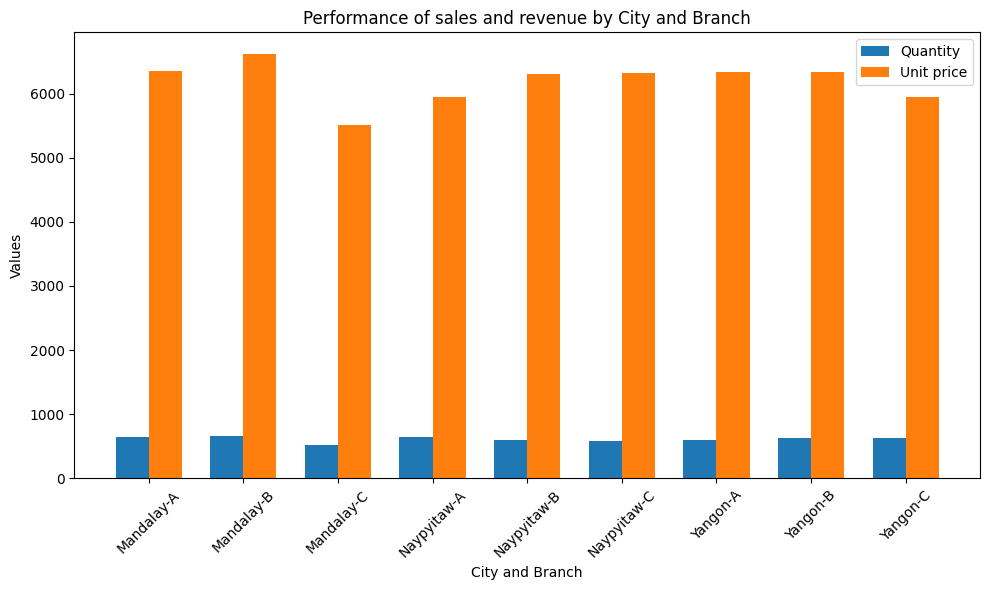

In [43]:
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
x = np.arange(len(city_branch_performance))

ax.bar(x - bar_width/2, city_branch_performance['Quantity'], bar_width, label='Quantity')
ax.bar(x + bar_width/2, city_branch_performance['Unit price'], bar_width, label='Unit price')

ax.set_xlabel('City and Branch')
ax.set_ylabel('Values')
ax.set_title('Performance of sales and revenue by City and Branch')
ax.set_xticks(x)
ax.set_xticklabels(city_branch_performance['City'] + '-' + city_branch_performance['Branch'], rotation=45)
ax.legend()

plt.tight_layout()
plt.show()

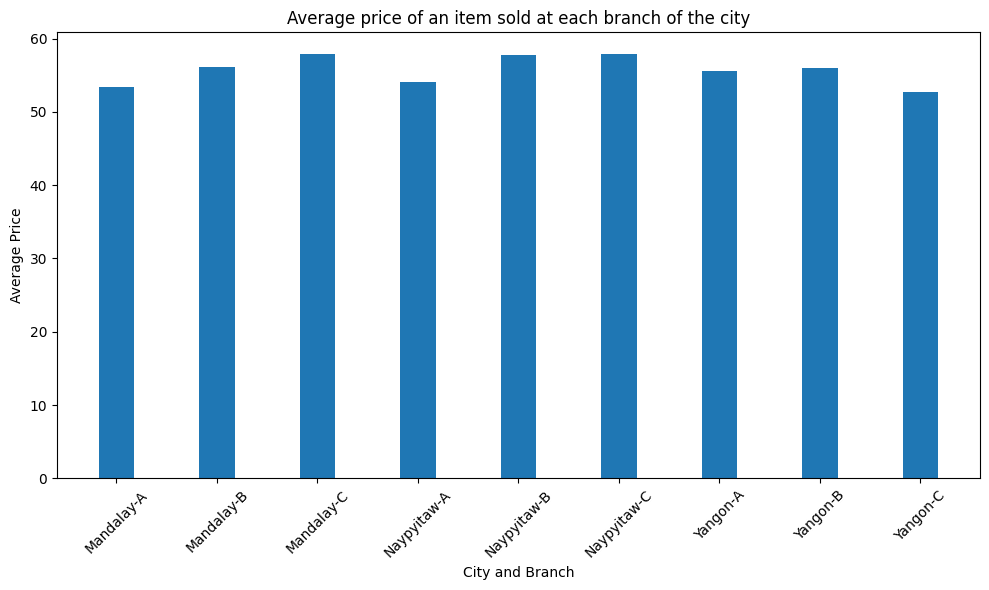

In [44]:
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.35
x = np.arange(len(average_price_per_branch))

ax.bar(x, average_price_per_branch['Unit price'], bar_width)

ax.set_xlabel('City and Branch')
ax.set_ylabel('Average Price')
ax.set_title('Average price of an item sold at each branch of the city')
ax.set_xticks(x)
ax.set_xticklabels(average_price_per_branch['City'] + '-' + average_price_per_branch['Branch'], rotation=45)

plt.tight_layout()
plt.show()


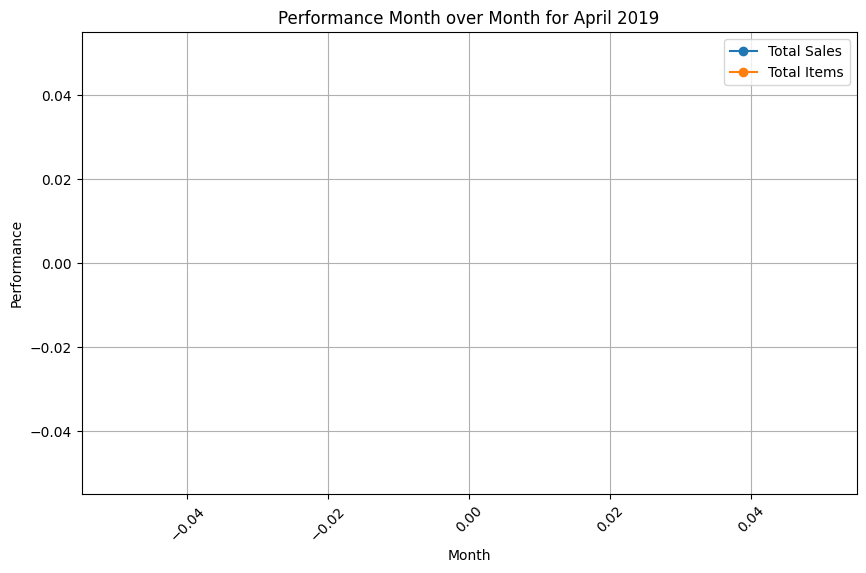

In [45]:
plt.figure(figsize=(10, 6))
plt.plot(april_data['Month'], april_data['total_sales'], marker='o', label='Total Sales')
plt.plot(april_data['Month'], april_data['total_items'], marker='o', label='Total Items')
plt.title('Performance Month over Month for April 2019')
plt.xlabel('Month')
plt.ylabel('Performance')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
2. App Exploration: (5 marks)
Answer- The app's concept is impressive. I particularly appreciate the introduction and sign-up pages, which are well-designed. The homepage is neatly organized, and the live gold pricing at the top of the page is easily accessible. The use of a purple colour palette throughout the app makes it stand out to me, and most of the icons are easily recognizable. In terms of functionality, the app runs smoothly, and the integration with UPI is done very well. However, there are two areas where the company could make improvements. Firstly, the "Spin and Win" feature often leaves users dissatisfied with the results. This could potentially have negative consequences for the company as users may find it irritating and decide to delete the app. Secondly, there is no option to delete the account, and the Jewellery section has bugs, such as not displaying any data on the screen. Additionally, adding a bright mode would be beneficial for users who are using the app in direct sunlight, as it may be difficult for them to see the icons.

In [ ]:
3. Product Optimisation: (5 marks)
Answer- The Jar app's "Spin to Win" feature has potential to boost user engagement, but currently only attracts a small portion of daily users. To reach the target of 50 daily spins, several improvements can be made. Firstly, by placing the game prominently and making it easily accessible with a single tap (currently user need to scroll down on homepage to find Spin and Win option), users will be more likely to notice and participate. Highlighting the benefits of playing, like showcasing recent winners and offering personalized rewards, can further incentivize users. Additionally, leveraging social influence through features like leaderboards can create a sense of competition and FOMO (fear of missing out). Finally, focusing on a visually appealing design with engaging animations and sound effects can make the spinning experience itself more enjoyable. By implementing these strategies and monitoring user engagement metrics, the Jar app can optimize the "Spin to Win" feature and achieve its goal of attracting more daily participants.